# interpolate

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))

In [28]:
p = lambda v_m, x, x_m, h: (v_m[None] * s_n(x[:, None] - x_m[None], h)).sum(axis=1)

In [29]:
f = lambda x: np.exp(np.sin(x))

In [105]:
def calc_p_fine(mx):
    L = 2 * np.pi
    nx_fine = 1000
    x_fine = np.linspace(0, L, nx_fine)

    h = L / mx
    x_m = np.linspace(h, L, mx)

    v_m = f(x_m)
    return x_fine, p(v_m, x, x_m, h)

/tmp/nix-shell.bQzgzI/ipykernel_3775532/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


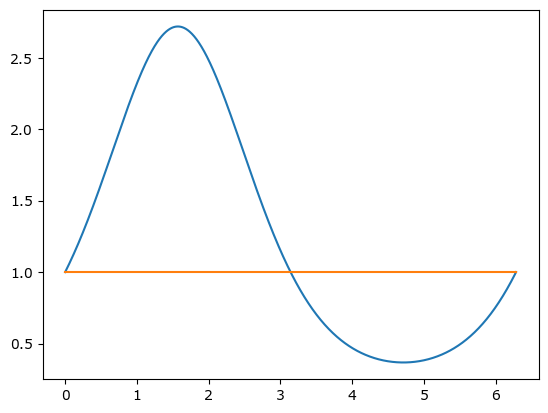

In [127]:
x, pp = calc_p_fine(2)
plt.plot(x, f(x))
plt.plot(x, pp)

/tmp/nix-shell.bQzgzI/ipykernel_3775532/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


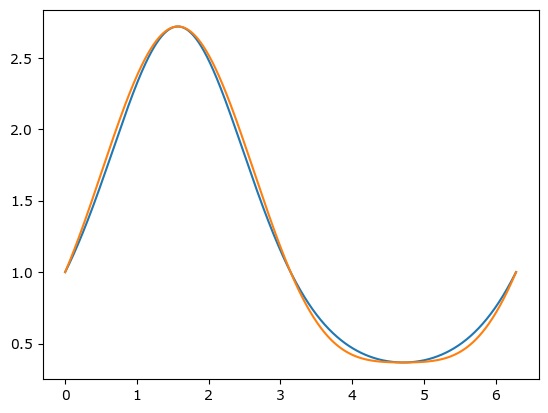

In [106]:
x, pp = calc_p_fine(4)
plt.plot(x, f(x))
plt.plot(x, pp)

/tmp/nix-shell.bQzgzI/ipykernel_3775532/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


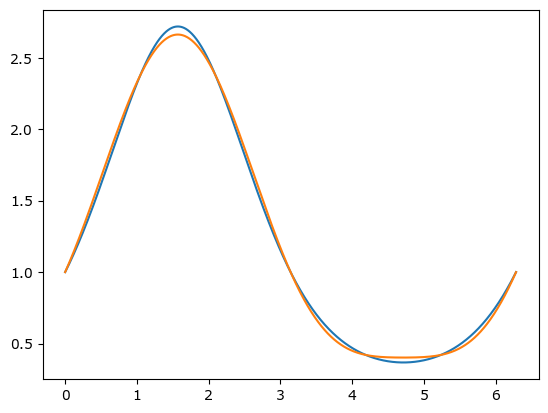

In [128]:
x, pp = calc_p_fine(6)
plt.plot(x, f(x))
plt.plot(x, pp)

/tmp/nix-shell.bQzgzI/ipykernel_3775532/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


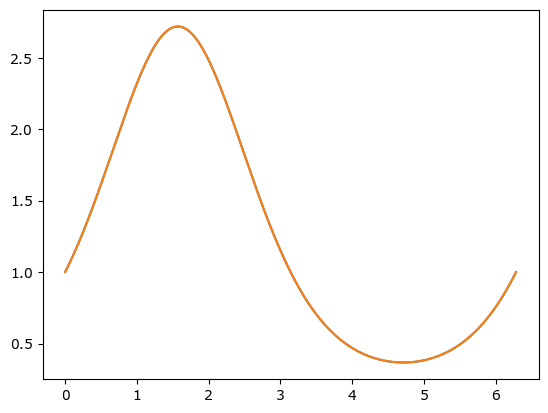

In [129]:
x, pp = calc_p_fine(8)
plt.plot(x, f(x))
plt.plot(x, pp)

In [107]:
def calc_norm(x, y, dx):
    return np.sum((x[1:] - y[1:])**2) * dx

def calc_p_norm(mx):
    x, pp = calc_p_fine(mx)
    dx = x[1] - x[0]
    return calc_norm(pp, f(x), dx) 

In [123]:
mxs = np.arange(1, 20) * 2

In [124]:
norms = [calc_p_norm(mx) for mx in mxs ]

/tmp/nix-shell.bQzgzI/ipykernel_3775532/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


In [125]:
norms

[4.696389143254409,
 0.012787676241151942,
 0.006365784522306929,
 1.8648638696179644e-06,
 9.388192195983736e-07,
 6.45270786525615e-11,
 3.238859898600018e-11,
 7.672655627364316e-16,
 3.845871112324418e-16,
 3.9273425096631955e-21,
 1.967127150972127e-21,
 1.0299990328122607e-26,
 5.0684507677811395e-27,
 5.524430496426519e-29,
 1.0163617154242654e-28,
 2.677405221600441e-29,
 3.560272956904633e-29,
 5.352416897048233e-29,
 6.584095047226193e-29]

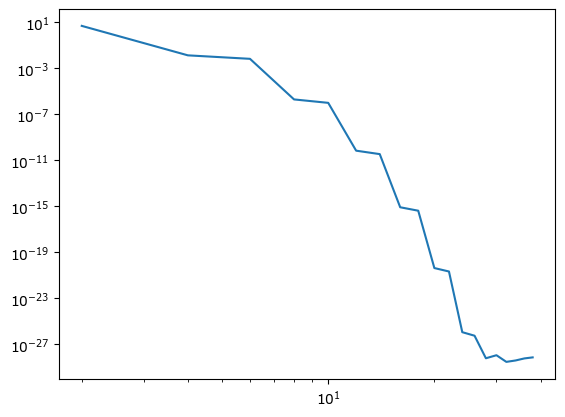

In [126]:
plt.loglog(mxs, norms)

# 2D

In [135]:
f2 = lambda x: np.exp(np.sin(x[0]) + np.cos(x[1])**2)

p2 = lambda v_m, x, x_m, h: (
    v_m[:, :, None, None] * s_n(x[0, None, None] - x_m[0, :, :, None, None], h) * \
    s_n(x[1, None, None] - x_m[1, :, :, None, None], h)
).sum(axis=(0, 1))

In [164]:
def calc_p_fine(mx):
    L = 2 * np.pi
    nx_fine = 1000
    x_fine = np.linspace(0, L, nx_fine)
    x = np.array(np.meshgrid(x_fine, x_fine))

    h = L / mx
    tmp = np.linspace(h, L, mx)
    x_m = np.array(np.meshgrid(tmp, tmp))

    v_m = f2(x_m)
    
    return x, p2(v_m, x, x_m, h)

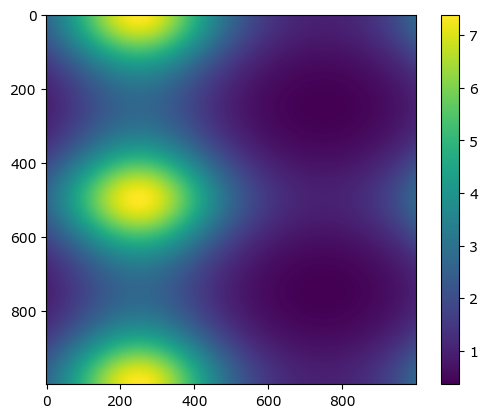

In [165]:
plt.imshow(f2(x))
plt.colorbar()

In [179]:
def calc_norm(x1, x2, dx):
    return np.sum((x1[1:, 1:] - x2[1:, 1:])**2) * dx**2

def calc_p_norm(mx):
    x, pp = calc_p_fine(mx)
    dx = x[0, 0, 1] - x[0, 0, 0]
    return calc_norm(pp, f2(x), dx) 

In [186]:
mxs = np.arange(1, 10) * 2

mse = [calc_p_norm(mx) for mx in mxs]

/tmp/nix-shell.bQzgzI/ipykernel_3775532/510097574.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


In [187]:
print(mse)

[124.97494743311893, 2.314052465875547, 1.143346556401513, 0.006955481025948702, 0.006893386538182082, 2.664537623320858e-05, 2.66444587806262e-05, 6.628280793352036e-08, 6.628279932537796e-08]


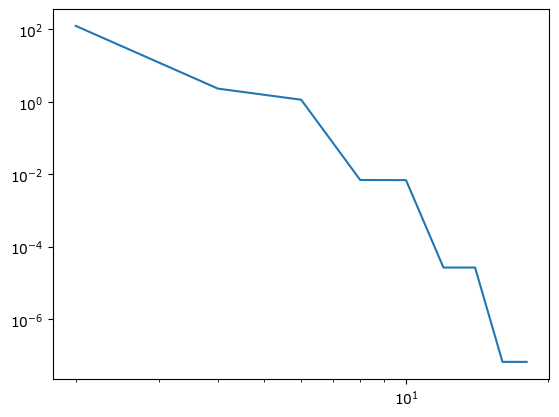

In [189]:
plt.loglog(mxs, mse)